In [5]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [6]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!
ufo.head()


# 1. change the column names so that each name has no spaces
#           and all lower case (replace spaces with underscores)

# 2. Show a bar chart of all shapes reported

# 3. Show a dataframe that only displays the reportings from Utah

# 4. Show a dataframe that only displays the reportings from Texas

# 5. Show a dataframe that only displays the reportings from Utah OR Texas

# 6. Which shape is reported most often?

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [12]:
ufo.rename(columns={'Colors Reported': 'colors_reported', 'shapes_reported': 'shape_reported', 'City':'city', 'State': 'state'
                ,'Time':'time'}, inplace=True)
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


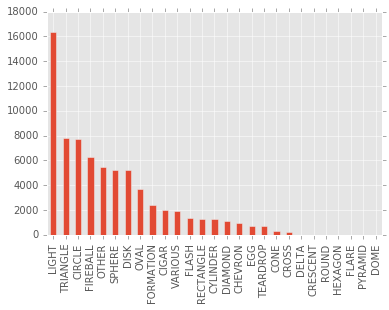

In [20]:
ufo['shape_reported'].value_counts().plot(kind ='bar')

In [27]:
#Utah
ufo_utah = ufo[ufo['state']=='UT']
ufo_utah.head()

#Texas
ufo_texas = ufo[ufo['state']=='TX']
ufo_texas.tail()

,city,colors_reported,shape_reported,state,time
80287,Lago Vista,NaN,TRIANGLE,TX,8/26/2014 3:35
80350,Houston,NaN,TRIANGLE,TX,8/28/2014 19:55
80414,Eustace,NaN,LIGHT,TX,8/30/2014 23:00
80476,Fort Worth,NaN,OTHER,TX,9/2/2014 16:05
80534,Burleson,NaN,LIGHT,TX,9/4/2014 22:30


In [32]:
ufo_tex_utah = ufo[(ufo.state=='TX') | (ufo.state=='UT')]
ufo_tex_utah.head()

,city,colors_reported,shape_reported,state,time
29,Ft. Duschene,NaN,DISK,UT,6/30/1944 10:00
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00


In [37]:
# 6. Which shape is reported most often?
#LIGHT
ufo.shape_reported.describe()

count     72141
unique       27
top       LIGHT
freq      16332
Name: shape_reported, dtype: object

In [101]:
'''
Part 2: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')
goals.sort_index(by='team1score', inplace = True)
goals.head()


# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
#     Hint: To replace, use a .apply lambda function to remove any plus symbols
#     Hint: look up pandas dataframes astype method
#     To check use the dataframe.describe() method to see if it is an integer

# 2. Show goals scored in the first 5 minutes of a game

# 3. Show goals scored after the regulation 90 minutes is over

# 4. Show the top scoring players

# 5. Show a histogram (distribution) of minutes with 20 bins

# 6. Show a histogram of the number of goals scored by players

/Users/Varun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,game_id,minute,player,team1score,team2score
1103,422,80,VlaoviÄ,0,2
1414,551,34,J. Cole,0,1
1423,554,60,FlÃ¡vio,0,1
1425,556,10,Å½igiÄ,0,1
1426,556,20,IliÄ,0,2


In [103]:
#goals.minute = [x.replace('+','') for x in goals.minute]
goals.minute = goals.minute.apply(lambda x:int(x.replace('+','')))


In [104]:
#goals.minute = goals.minute.astype(int)
goals.describe()

,game_id,minute,team1score,team2score
count,2207.000000,2207.000000,2207.000000,2207.000000
mean,428.732216,50.905754,1.754418,0.849570
std,251.548662,27.514559,1.486246,0.914291
min,1.000000,1.000000,0.000000,0.000000
25%,242.000000,27.000000,1.000000,0.000000
50%,422.000000,53.000000,1.000000,1.000000
75%,651.500000,75.000000,2.000000,1.000000
max,836.000000,120.000000,9.000000,7.000000


In [105]:
goals[goals.minute<=5]

,game_id,minute,player,team1score,team2score
1505,591,3,PetrÃ¡Å¡,0,1
404,130,1,Park Seung-jin,0,1
488,217,4,VujadinoviÄ,0,1
536,238,2,ButragueÃ±o,0,1
1350,524,4,Pauleta,0,1
1355,526,5,Koller,0,1
1408,549,4,Klose,0,1
1390,541,2,Gyan,0,1
1400,547,4,Rusol,0,1
1679,662,5,Prince Boateng,0,1


In [108]:
goals[goals.minute>=90]

,game_id,minute,player,team1score,team2score
1471,577,119,Grosso,0,1
1472,577,120,Del Piero,0,2
1602,629,90,Ã. Pereira,0,3
868,335,90,Lozano,0,2
895,345,90,Sirakov,0,2
897,346,90,Amokachi,0,2
619,267,90,VÃ¶ller,0,2
1191,459,90,Fonseca,0,1
2057,806,94,Ä°lhan [Golden Goal],0,1
1127,431,90,LuhovÃ½,1,5


In [134]:
goals_by_player = goals.groupby('player').count()
goals_by_player.sort_index(by='game_id', ascending = False).head(10)



/Users/Varun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,game_id,minute,team1score,team2score
player,,,,
MÃ¼ller,20,20,20,20
Ronaldo,14,14,14,14
Klose,14,14,14,14
Fontaine,13,13,13,13
PelÃ©,12,12,12,12
Kocsis,11,11,11,11
Klinsmann,11,11,11,11
Rahn,10,10,10,10
Lato,10,10,10,10


In [135]:
goals[goals.player=='Ronaldo']

,game_id,minute,player,team1score,team2score
2012,787,13,Ronaldo,0,2
2011,787,10,Ronaldo,0,1
1105,423,46,Ronaldo,1,0
984,380,9,Ronaldo,1,0
2065,810,67,Ronaldo,1,0
2059,808,49,Ronaldo,1,0
1933,756,50,Ronaldo,1,1
1436,559,45,Ronaldo,1,1
1439,559,81,Ronaldo,1,4
1458,571,5,Ronaldo,1,0
